# Parte 2 - IMDB
## A

In [1]:
import numpy as np
import random
from theano.tensor.shared_randomstreams import RandomStreams
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential,load_model_model_model
from keras.layers import Dense, LSTM, Dropout
from keras.layers.embeddings import Embedding
import matplotlib.pyplot as plt
np.random.seed(3)
srng = RandomStreams(8)

In [2]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(seed=15)
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

Review length: 


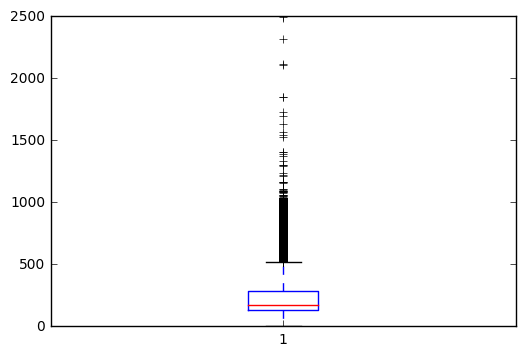

In [3]:
print("Review length: ")
result = map(len, X)
plt.boxplot(result)
plt.show()

In [4]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=3000, seed=15)
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

## D - Red LSTM con Embedding 32 y 3000 Top Words

In [ ]:
embedding_vector_length = 32
top_words=3000
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=500))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=3, batch_size=64)
model.save("P2-D.h5")

In [12]:
#Eval Model P2D
model=load_model("P2-D.h5")
scores = model.evaluate(X_test, y_test, verbose=1)
print "Loss: {0}   Accuracy: {1}".format(scores[0],scores[1])

25000/25000 [==============================] - 184s   
Loss: 0.354214026219   Accuracy: 0.86204


## E - Red LSTM con 3000 Top Words y Embedding Variable

In [ ]:
top_words=3000
for embedding_vector_length in [4,8,16,64,128,256]:
    print "EVL:",embedding_vector_length
    #train
    model = Sequential()
    model.add(Embedding(top_words, embedding_vector_length, input_length=500))
    model.add(LSTM(100))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=3, batch_size=64)
    model.save("P2-E{0}.h5".format(embedding_vector_length))
    

    #train

In [13]:
#Eval Model P2E-4-8-16-64-128-256
for N in [4,8,16,64,128,256]:
    model=load_model("P2-E{0}.h5".format(N))
    scores = model.evaluate(X_test, y_test, verbose=1)
    print "Embedding Length: {2}   Loss: {0}   Accuracy: {1}".format(scores[0],scores[1],N)

25000/25000 [==============================] - 172s   
Embedding Length: 4   Loss: 0.325102408178   Accuracy: 0.86124
25000/25000 [==============================] - 183s   
Embedding Length: 8   Loss: 0.308502162189   Accuracy: 0.8694
25000/25000 [==============================] - 196s   
Embedding Length: 16   Loss: 0.307057818151   Accuracy: 0.87236
25000/25000 [==============================] - 209s   
Embedding Length: 64   Loss: 0.484832670898   Accuracy: 0.76308
25000/25000 [==============================] - 222s   
Embedding Length: 128   Loss: 0.318453605099   Accuracy: 0.86652
25000/25000 [==============================] - 206s   
Embedding Length: 256   Loss: 0.377454812565   Accuracy: 0.84724


## F - Red LSTM con Embedding 32 y Top Words variables

In [10]:
embedding_vector_length=32
for top_words in [500,1000,2000,4000,5000,10000]:
    (X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=top_words, seed=15)
    X_train = sequence.pad_sequences(X_train, maxlen=500)
    X_test = sequence.pad_sequences(X_test, maxlen=500)
    print "TW:",top_words
    model = Sequential()
    model.add(Embedding(top_words, embedding_vector_length, input_length=500))
    model.add(LSTM(100))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=3, batch_size=64)
    model.save("P2-F{0}.h5".format(top_words))

TW: 500
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 494s - loss: 0.5697 - acc: 0.6998 - val_loss: 0.4147 - val_acc: 0.8151
Epoch 2/3
25000/25000 [==============================] - 488s - loss: 0.4535 - acc: 0.7954 - val_loss: 0.4149 - val_acc: 0.8145
Epoch 3/3
25000/25000 [==============================] - 489s - loss: 0.4037 - acc: 0.8238 - val_loss: 0.4795 - val_acc: 0.7692
TW: 1000
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 490s - loss: 0.5235 - acc: 0.7318 - val_loss: 0.4073 - val_acc: 0.8209
Epoch 2/3
25000/25000 [==============================] - 488s - loss: 0.3577 - acc: 0.8502 - val_loss: 0.3444 - val_acc: 0.8561
Epoch 3/3
25000/25000 [==============================] - 527s - loss: 0.3345 - acc: 0.8608 - val_loss: 0.3247 - val_acc: 0.8626
TW: 2000
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] -

In [15]:
#Eval Model P2F-500-1000-2000-5000-10000
for N in [500,1000,2000,4000,5000,10000]:
    (X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=N, seed=15)
    X_train = sequence.pad_sequences(X_train, maxlen=500)
    X_test = sequence.pad_sequences(X_test, maxlen=500)
    model=load_model("P2-F{0}.h5".format(N))
    scores = model.evaluate(X_test, y_test, verbose=1)
    print "Top Words: {2}   Loss: {0}   Accuracy: {1}".format(scores[0],scores[1],N)

25000/25000 [==============================] - 199s   
Top Words: 500   Loss: 0.479502602189   Accuracy: 0.7692
25000/25000 [==============================] - 180s   
Top Words: 1000   Loss: 0.324712305365   Accuracy: 0.86264
25000/25000 [==============================] - 186s   
Top Words: 2000   Loss: 0.319714357708   Accuracy: 0.86336
25000/25000 [==============================] - 182s   
Top Words: 4000   Loss: 0.307830250864   Accuracy: 0.87212
25000/25000 [==============================] - 188s   
Top Words: 5000   Loss: 0.36467007   Accuracy: 0.84852
25000/25000 [==============================] - 197s   
Top Words: 10000   Loss: 0.416235581527   Accuracy: 0.8464


## G - Red LSTM + Dropout con Embedding  y Top Words variables

In [9]:
embedding_vector_length = 32
top_words=3000

for embedding_vector_length in [8,16,64,128]:
    model = Sequential()
    model.add(Embedding(top_words, embedding_vector_length, input_length=500))
    model.add(Dropout(0.2))
    model.add(LSTM(100))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    #print(model.summary())
    model.fit(X_train, y_train, nb_epoch=3, batch_size=64)
    #scores = model.evaluate(X_test, y_test, verbose=1)
    model.save("P2-G{0}-3000.h5".format(embedding_vector_length))


Epoch 1/3
25000/25000 [==============================] - 425s - loss: 0.5600 - acc: 0.7071   
Epoch 2/3
25000/25000 [==============================] - 447s - loss: 0.3785 - acc: 0.8459   
Epoch 3/3
25000/25000 [==============================] - 545s - loss: 0.3432 - acc: 0.8577   
Epoch 1/3
25000/25000 [==============================] - 500s - loss: 0.5417 - acc: 0.7129   
Epoch 2/3
25000/25000 [==============================] - 475s - loss: 0.3923 - acc: 0.8320   
Epoch 3/3
25000/25000 [==============================] - 520s - loss: 0.3355 - acc: 0.8610   
Epoch 1/3
25000/25000 [==============================] - 474s - loss: 0.4616 - acc: 0.7740   
Epoch 2/3
25000/25000 [==============================] - 490s - loss: 0.3020 - acc: 0.8790   
Epoch 3/3
25000/25000 [==============================] - 526s - loss: 0.2575 - acc: 0.8961   
Epoch 1/3
25000/25000 [==============================] - 510s - loss: 0.4821 - acc: 0.7656   
Epoch 2/3
25000/25000 [==============================] - 510

In [17]:
#Eval Model P2G-[8-16-64-128]-3000
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=3000, seed=15)
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)
for N in [8,16,64,128]:
    model=load_model("P2-G{0}-3000.h5".format(N))
    scores = model.evaluate(X_test, y_test, verbose=1)
    print "Embedding Length: {2}   Loss: {0}   Accuracy: {1}".format(scores[0],scores[1],N)

25000/25000 [==============================] - 200s   
Embedding Length: 8   Loss: 0.324595310359   Accuracy: 0.867
25000/25000 [==============================] - 183s   
Embedding Length: 16   Loss: 0.414800869255   Accuracy: 0.84056
25000/25000 [==============================] - 200s   
Embedding Length: 64   Loss: 0.314571367285   Accuracy: 0.87568
25000/25000 [==============================] - 190s   
Embedding Length: 128   Loss: 0.332669987898   Accuracy: 0.87304


In [10]:
embedding_vector_length=32
for top_words in [1000,2000,3000,4000,5000]:
    (X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=top_words, seed=15)
    X_train = sequence.pad_sequences(X_train, maxlen=500)
    X_test = sequence.pad_sequences(X_test, maxlen=500)
    model = Sequential()
    model.add(Embedding(top_words, embedding_vector_length, input_length=500))
    model.add(Dropout(0.2))
    model.add(LSTM(100))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    #print(model.summary())
    model.fit(X_train, y_train, nb_epoch=3, batch_size=64)
    #scores = model.evaluate(X_test, y_test, verbose=1)
    model.save("P2-G32-{0}.h5".format(top_words))

Epoch 1/3
25000/25000 [==============================] - 447s - loss: 0.5641 - acc: 0.7095   
Epoch 2/3
25000/25000 [==============================] - 466s - loss: 0.4482 - acc: 0.8039   
Epoch 3/3
25000/25000 [==============================] - 475s - loss: 0.3940 - acc: 0.8355   
Epoch 1/3
25000/25000 [==============================] - 463s - loss: 0.5826 - acc: 0.6768   
Epoch 2/3
25000/25000 [==============================] - 457s - loss: 0.4192 - acc: 0.8139   
Epoch 3/3
25000/25000 [==============================] - 461s - loss: 0.3580 - acc: 0.8472   
Epoch 1/3
25000/25000 [==============================] - 427s - loss: 0.5282 - acc: 0.7272   
Epoch 2/3
25000/25000 [==============================] - 406s - loss: 0.3257 - acc: 0.8681   
Epoch 3/3
25000/25000 [==============================] - 401s - loss: 0.2785 - acc: 0.8884   
Epoch 1/3
25000/25000 [==============================] - 394s - loss: 0.6240 - acc: 0.6582   
Epoch 2/3
25000/25000 [==============================] - 387

In [18]:
#Eval Model P2G-32-[500-1000-2000-5000-10000]

for N in [1000,2000,3000,4000,5000]:
    (X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=N, seed=15)
    X_train = sequence.pad_sequences(X_train, maxlen=500)
    X_test = sequence.pad_sequences(X_test, maxlen=500)
    model=load_model("P2-G32-{0}.h5".format(N))
    scores = model.evaluate(X_test, y_test, verbose=1)
    print "Top Words: {2}   Loss: {0}   Accuracy: {1}".format(scores[0],scores[1],N)

25000/25000 [==============================] - 189s   
Top Words: 1000   Loss: 0.400974370446   Accuracy: 0.83472
25000/25000 [==============================] - 188s   
Top Words: 2000   Loss: 0.337027104659   Accuracy: 0.8606
25000/25000 [==============================] - 190s   
Top Words: 3000   Loss: 0.309789932151   Accuracy: 0.86924
25000/25000 [==============================] - 203s   
Top Words: 4000   Loss: 0.321982482461   Accuracy: 0.86596
25000/25000 [==============================] - 198s   
Top Words: 5000   Loss: 0.335232408721   Accuracy: 0.85232
